In [1]:
import sys
sys.path.append('../../../Scripts/')

In [ ]:
import text_preprocessing as tp
import baseline_model as base
import plots as pl
import pandas as pd, numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
path = '../Data/'

## Data

In [5]:
train = pd.read_csv(f'{path}sentiment_train.csv')
test = pd.read_csv(f'{path}sentiment_test.csv')

## Preprocessing

In [6]:
prep = tp.Preprocessing('english')

In [7]:
train_prep = prep.main_preprocess(train, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

In [8]:
test_prep = prep.main_preprocess(test, 
                                column= 'sentence',
                                tweet = False,
                                tweet_tags = False,
                                remove_stop_words = False,
                                lemmatize = True,
                                translate_emojis = False,
                                whitelist = "")

## Baseline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
target_names = ['Negative', 'Positive']

seed = 42

### Logistic Regression

Model: Logistic Regression(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.82


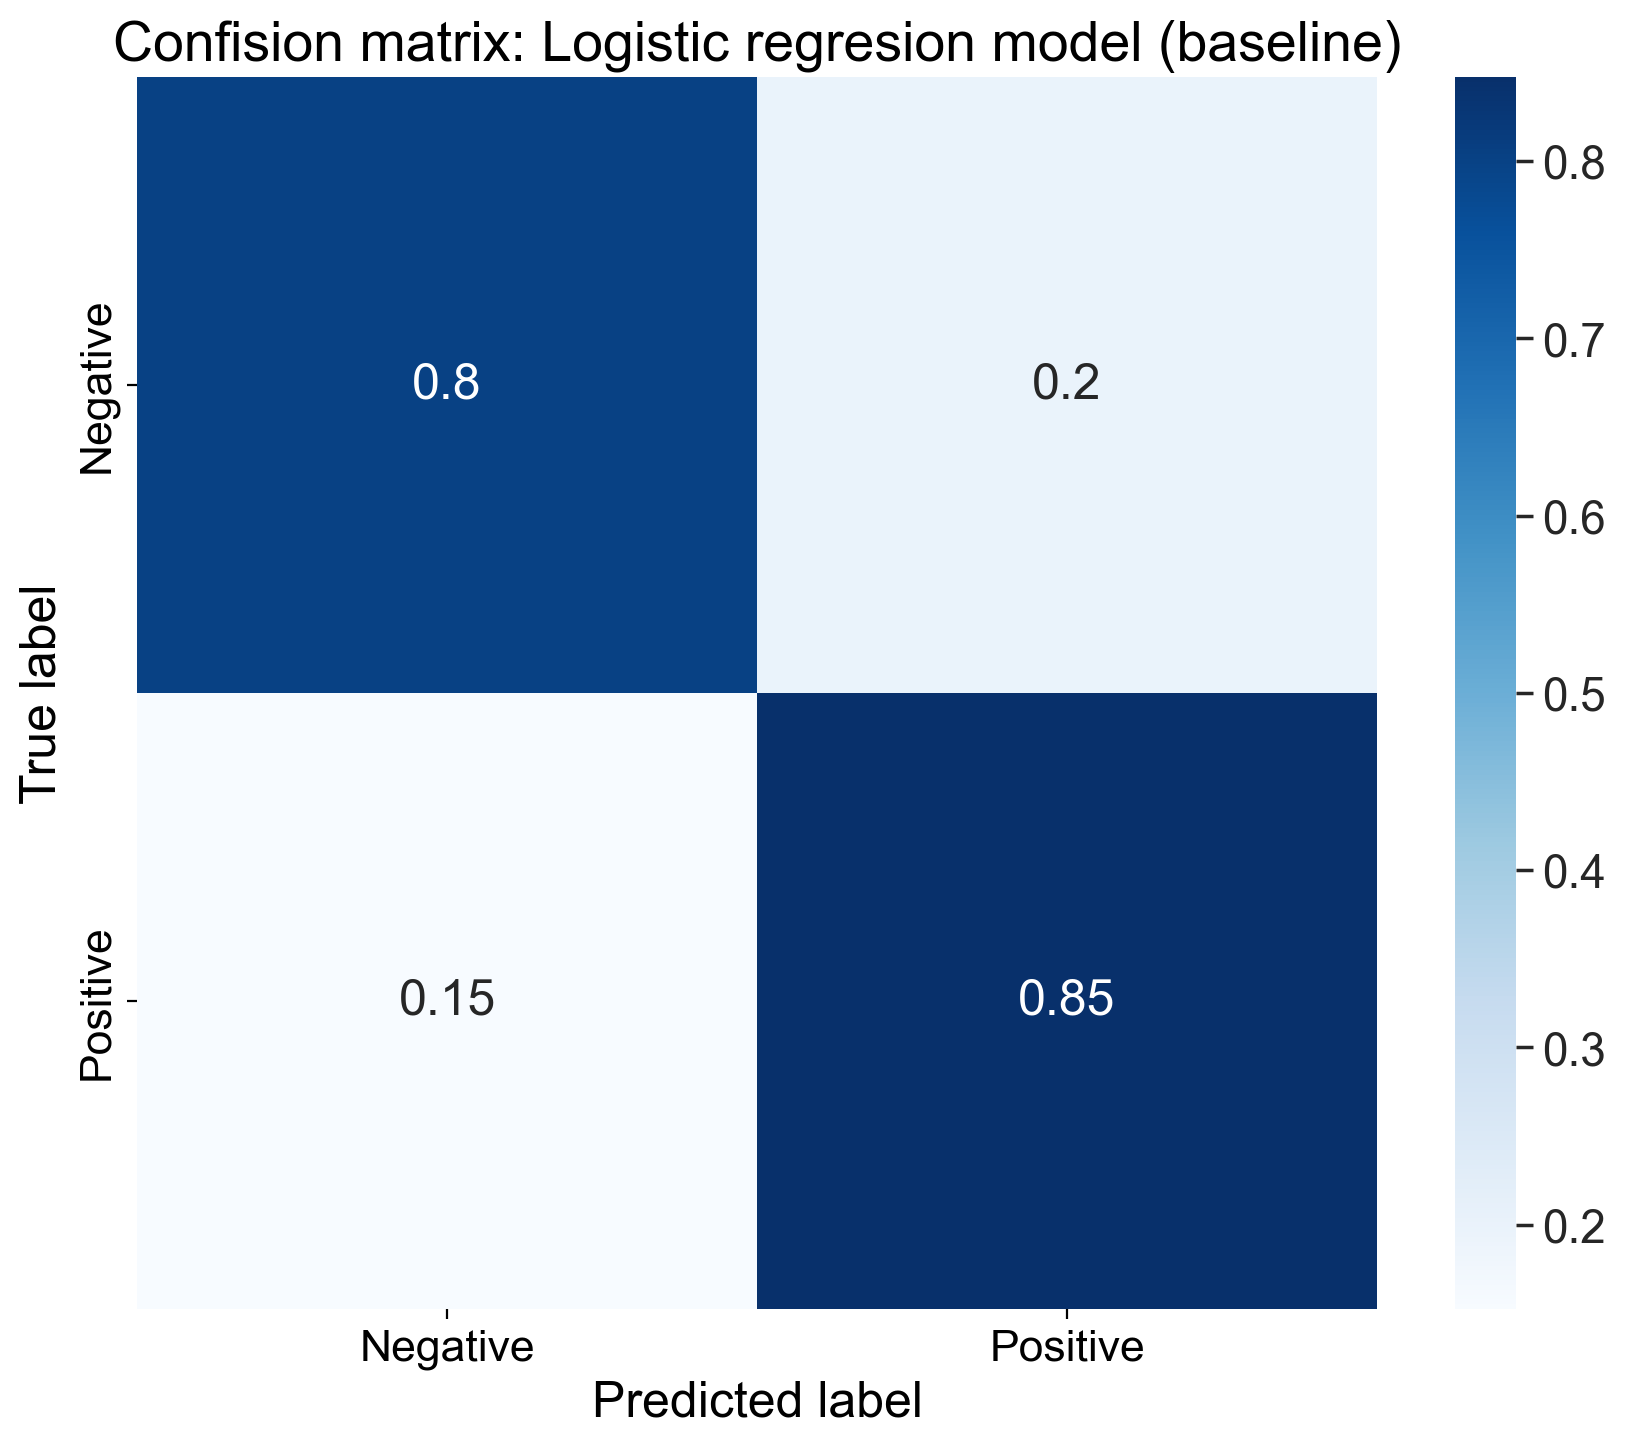

In [11]:
lr = LogisticRegression(random_state=seed)
b = base.Baseline(model=lr, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Logistic Regression', 
                target_names=target_names)

model_lr, vectorizer_lr, metrics_lr = b.baseline()

plot_lr = pl.Plots(metrics_lr)
plot_lr.plot_confusion_matrix(title='Confision matrix: Logistic regresion model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [12]:
print(metrics_lr[0])

              precision    recall  f1-score   support

    Negative       0.84      0.80      0.82       454
    Positive       0.81      0.85      0.83       446

    accuracy                           0.82       900
   macro avg       0.83      0.82      0.82       900
weighted avg       0.83      0.82      0.82       900



### Random forest

Model: Random forest(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.8


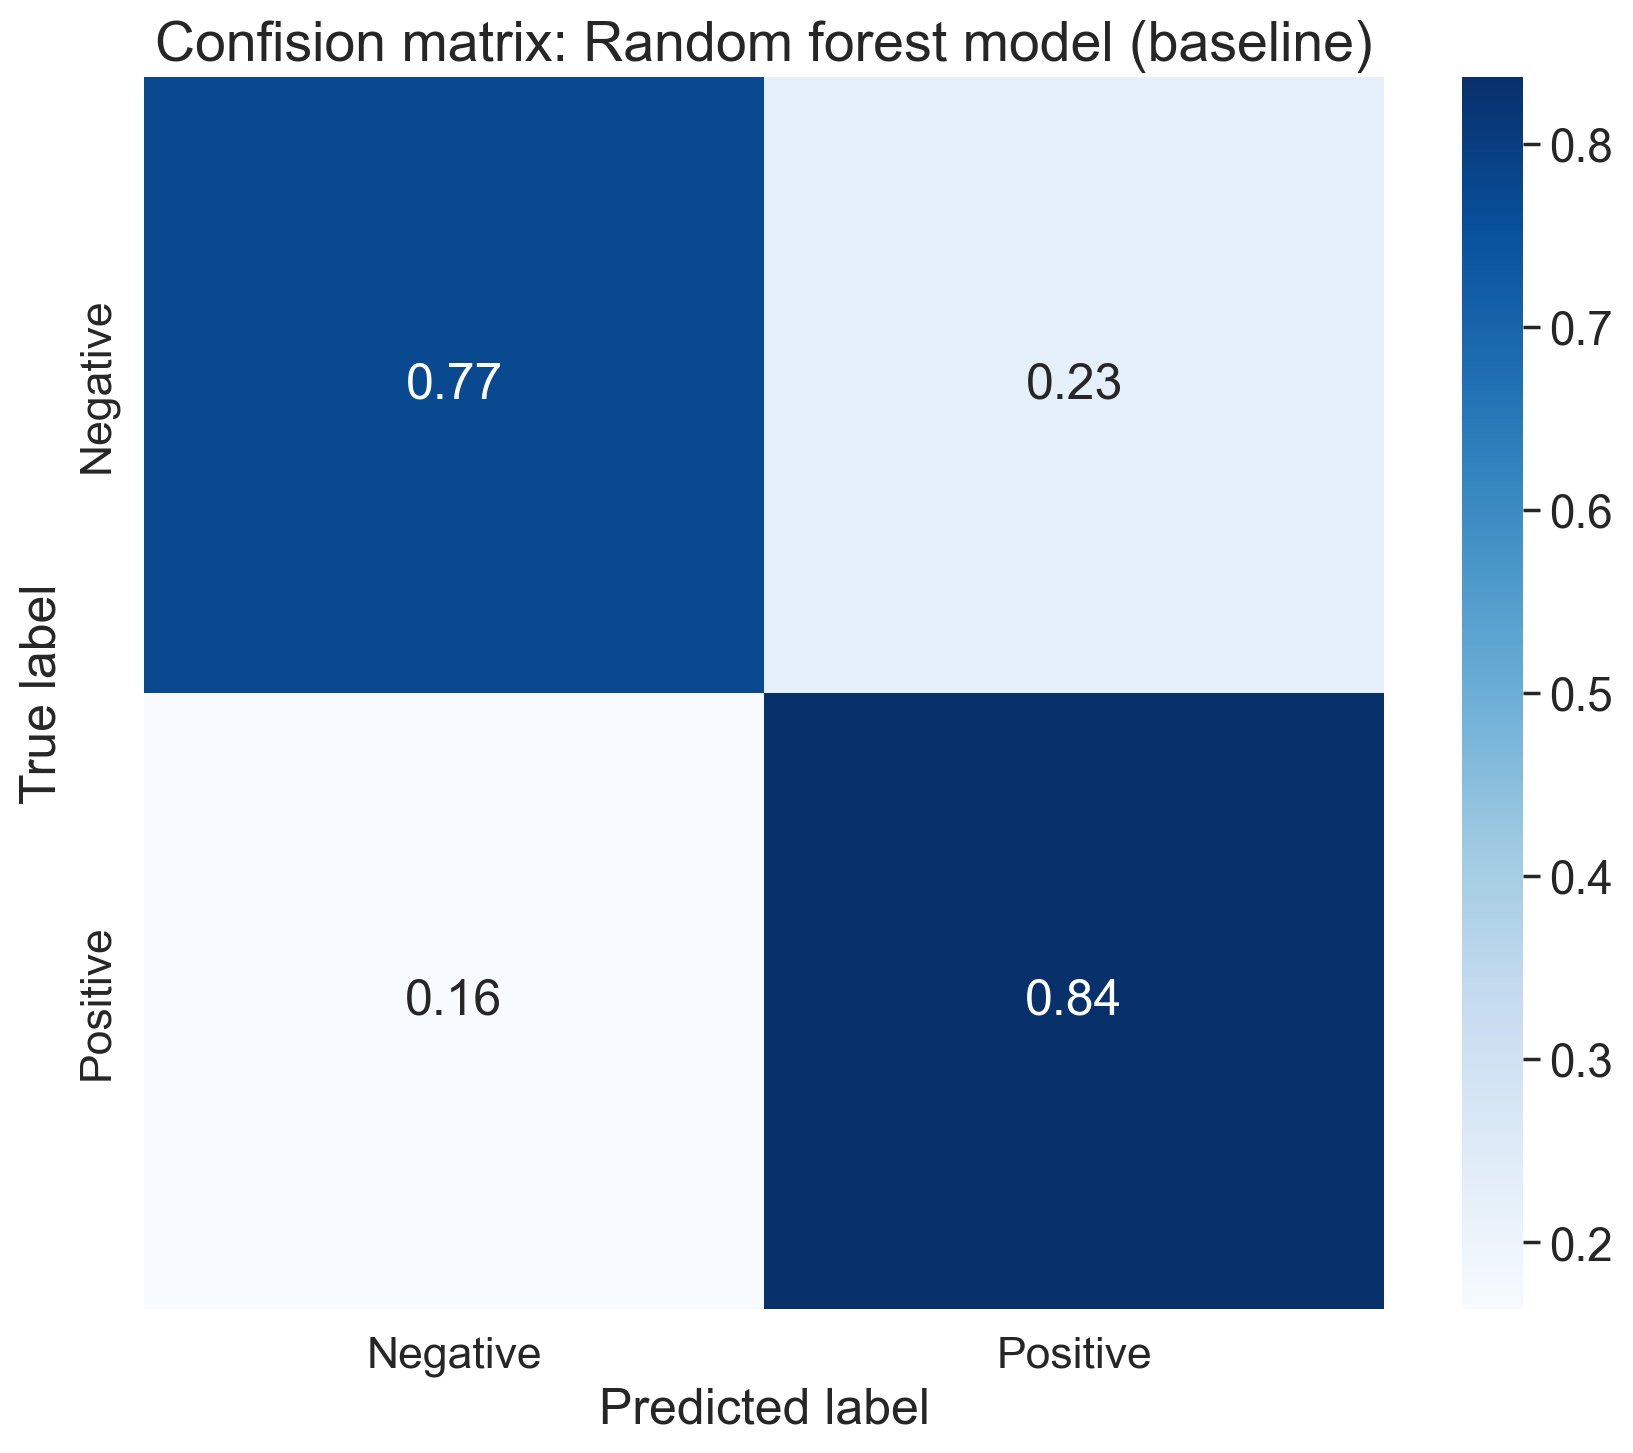

In [13]:
rf = RandomForestClassifier(random_state=seed)
b = base.Baseline(model=rf, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Random forest', 
                target_names=target_names)

model_rf, vectorizer_rf, metrics_rf = b.baseline()

plot_rf = pl.Plots(metrics_rf)
plot_rf.plot_confusion_matrix(title='Confision matrix: Random forest model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [14]:
print(metrics_rf[0])

              precision    recall  f1-score   support

    Negative       0.83      0.77      0.80       454
    Positive       0.78      0.84      0.81       446

    accuracy                           0.80       900
   macro avg       0.80      0.80      0.80       900
weighted avg       0.80      0.80      0.80       900



### Decision tree

Model: Decision tree(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.76


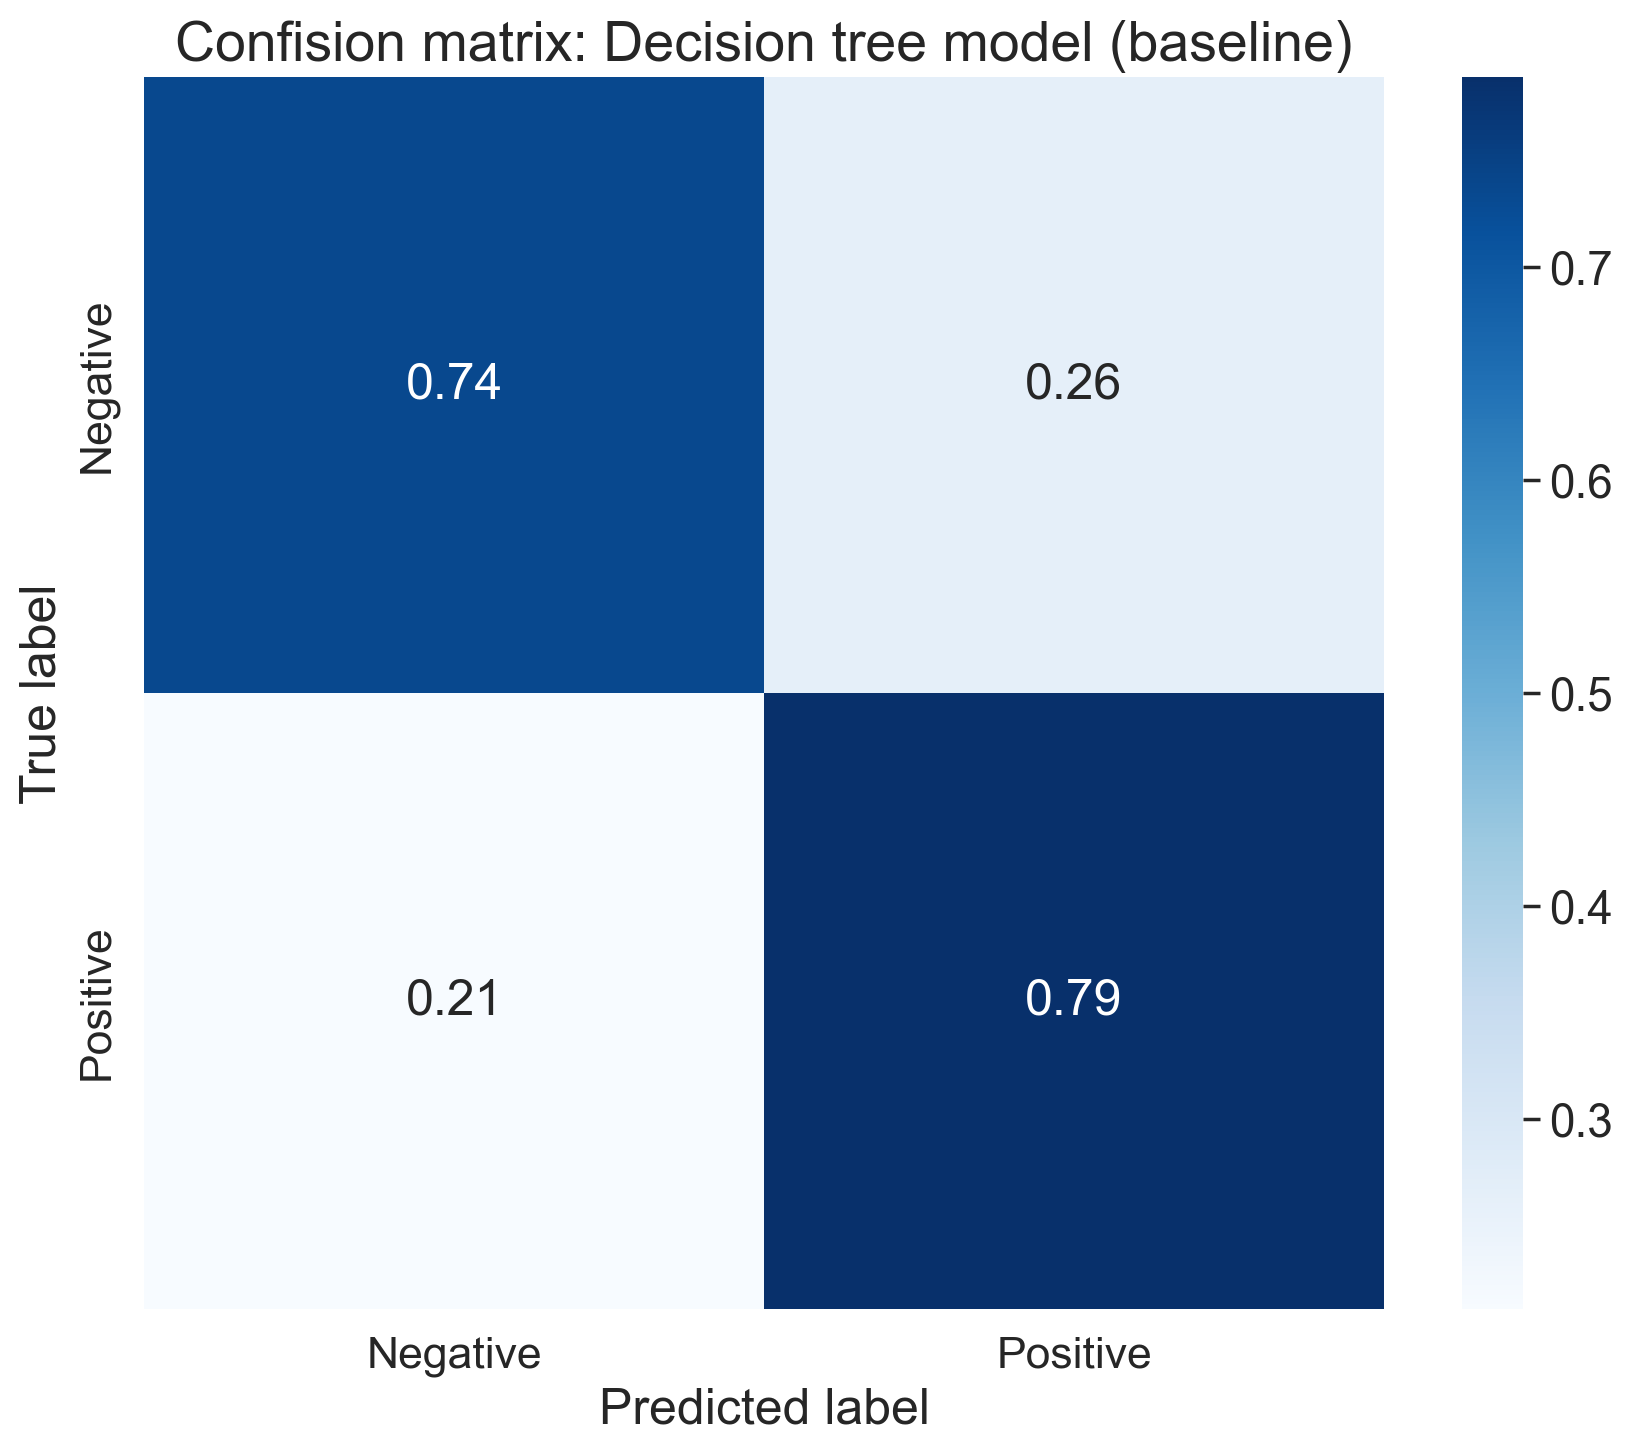

In [15]:
dt = DecisionTreeClassifier(random_state=seed)
b = base.Baseline(model=dt, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='Decision tree', 
                target_names=target_names)

model_dt, vectorizer_dt, metrics_dt = b.baseline()

plot_dt = pl.Plots(metrics_dt)
plot_dt.plot_confusion_matrix(title='Confision matrix: Decision tree model (baseline)', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)


In [16]:
print(metrics_dt[0])

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       454
    Positive       0.75      0.79      0.77       446

    accuracy                           0.76       900
   macro avg       0.76      0.76      0.76       900
weighted avg       0.76      0.76      0.76       900



### SVM

Model: SVM(Ngram: (1, 3), Min_df:3) --> Accuracy: 0.85


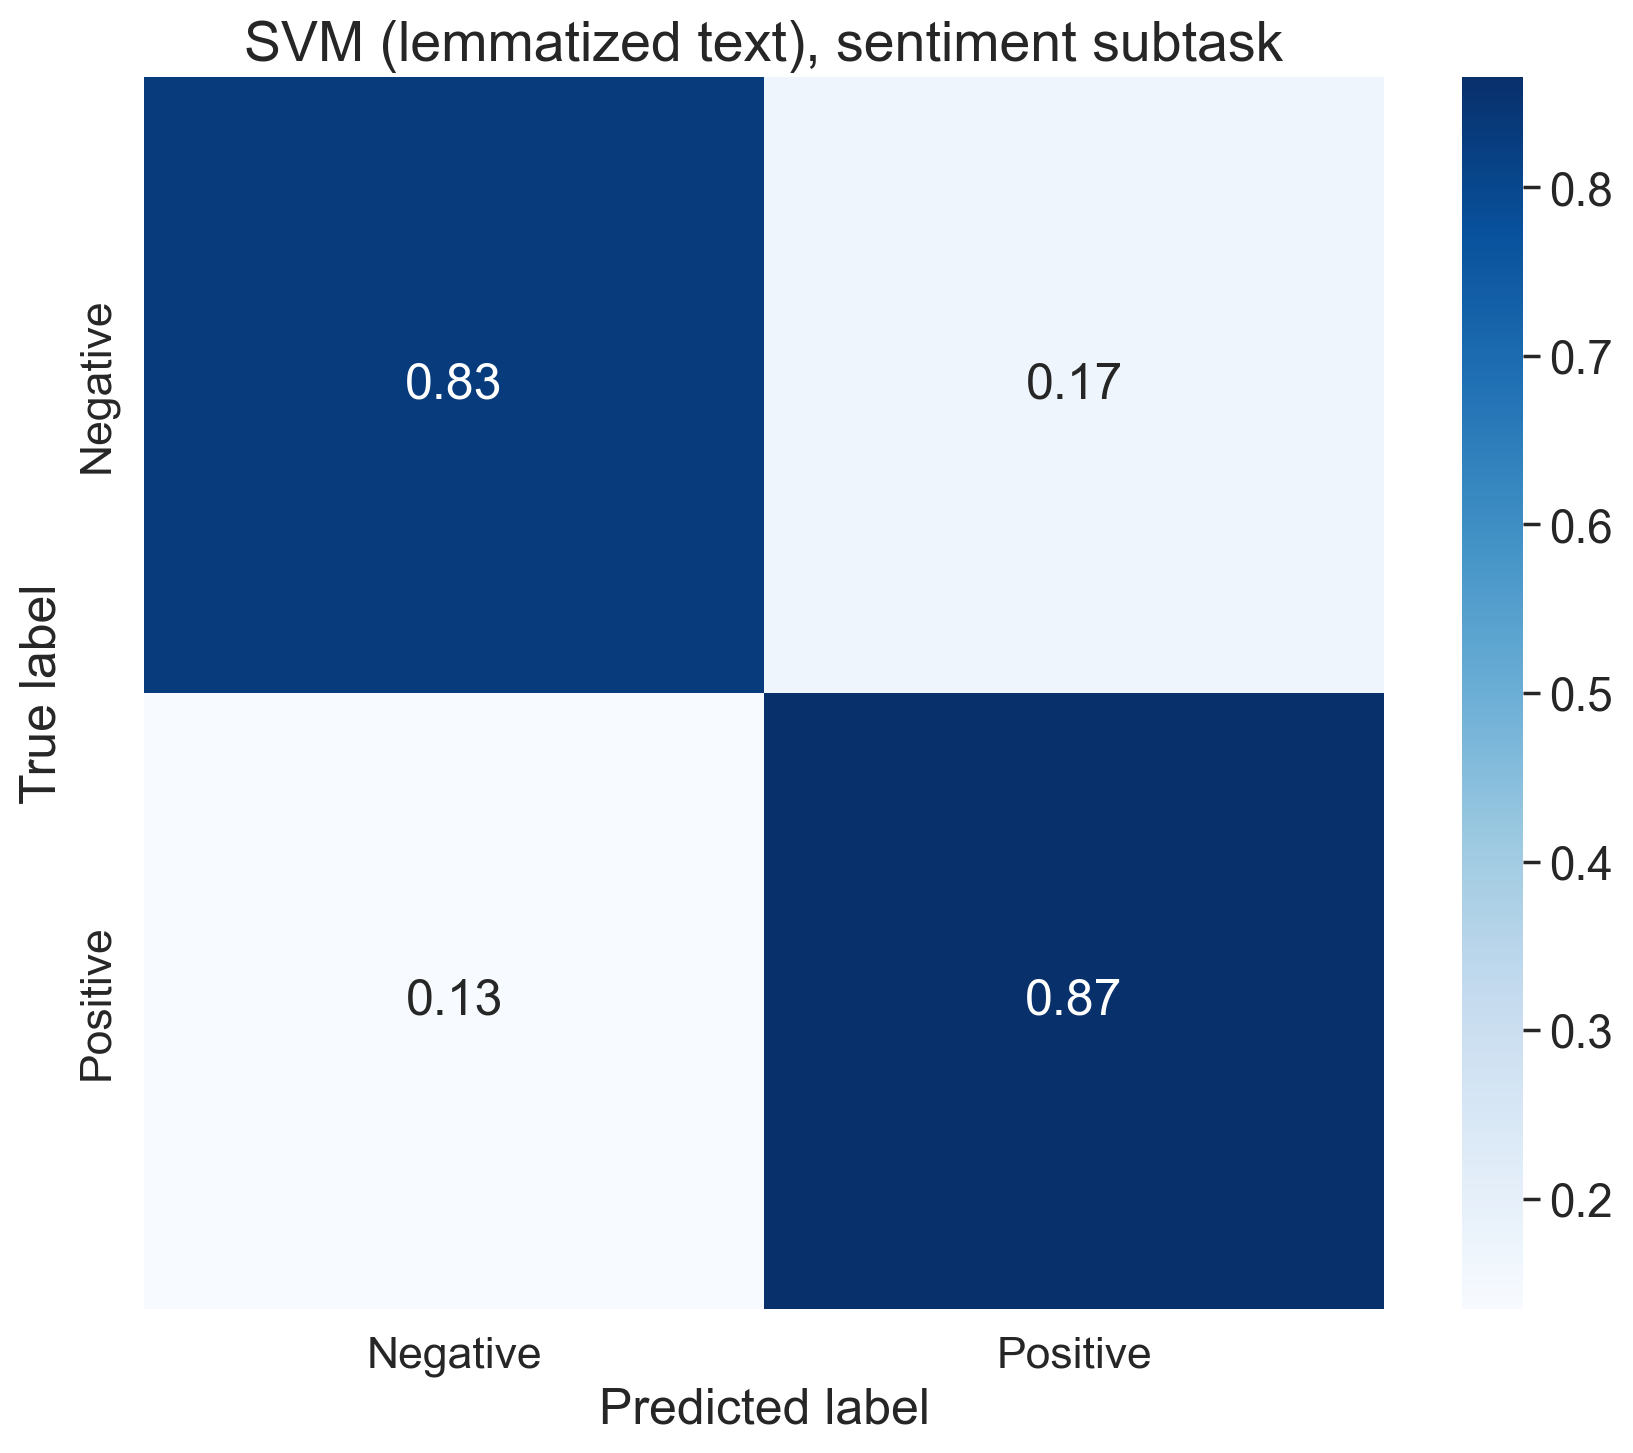

In [20]:
svm = SVC(random_state=seed)
b = base.Baseline(model=svm, 
                train_data=train_prep, 
                test_data=test_prep, 
                x_label_column='sentence', 
                y_label_column='label', 
                ngram_range=(1,3),
                min_df=3, 
                model_name='SVM', 
                target_names=target_names)

model_svm, vectorizer_svm, metrics_svm = b.baseline()

plot_svm = pl.Plots(metrics_svm)
plot_svm.plot_confusion_matrix(title='SVM (lemmatized text), sentiment subtask', 
                            x_label='Predicted label', 
                            y_label='True label', 
                            labels=target_names)

In [18]:
print(metrics_svm[0])

              precision    recall  f1-score   support

    Negative       0.86      0.83      0.85       454
    Positive       0.84      0.87      0.85       446

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900

